<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/v2/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасетов

In [ ]:
from IPython.display import clear_output

## Датасет на русском языке

In [ ]:
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu

!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu
!wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu /content/ru_syntagrus-ud-train-b.conllu
!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu /content/ru_syntagrus-ud-train-c.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu /content/ru_syntagrus-ud-dev.conllu

!mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu

clear_output()

# Data structure creating

In [ ]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc

In [ ]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.words = []

    def add_word(self, word):
        self.words.append(word)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.words) > 0


# Treebank data getting

In [ ]:
import os

def get_treebank_file(path):
    get_command = f"wget -m {path}"
    print(get_command)
    os.system(get_command)
    download_path = "/content/" + path.replace("https://", "")
    itog_path = "/content/" + path.split("/")[-1]
    mv_command = f"mv {download_path} {itog_path}"
    print(mv_command)
    os.system(mv_command)
    return itog_path

In [ ]:
class TreebankData:
    def __init__(self, train_files, dev_files, test_files):
        self.train = []
        for path in train_files:
            conll_path = get_treebank_file(path)
            self.train += self.read_conll(conll_path)

        self.dev = []
        for path in dev_files:
            conll_path = get_treebank_file(path)
            self.dev += self.read_conll(conll_path)

        self.test = []
        for path in test_files:
            conll_path = get_treebank_file(path)
            self.test += self.read_conll(conll_path)

    def read_conll(self, filename):
        fh = open(filename,'r',encoding='utf-8')
        sents_read = 0
        sents = []
        comments = set()

        sent = Sentence()
        for line in fh:
            tok = line.strip().split('\t')
            if not tok or line.strip() == '': # empty line, add sentence to list
                if sent.is_not_empty:
                    sents_read += 1
                    sents.append(sent)
                sent = Sentence()
            else:
                if line[0] == '#' or '-' in tok[0]: # a comment line
                    line = line.strip()
                    if line[:12] == "# sent_id = ":
                        sent.set_sent_id(line[12:])
                    elif line[:9] == "# text = ":
                        sent.set_text(line[9:])
                    else:
                        comments.add(line)

                else: # an actual ConllEntry, add to tokens
                    if tok[2] == "_":
                        tok[2] = tok[1].lower()

                    word = ConllEntry(*tok)
                    sent.add_word(word)
        fh.close()
        return sents


In [ ]:
treebank_paths = { 'rus': ( [ "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu"
                            , "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu"])
                 , 'eng': (["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-train.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-dev.conllu"]
                         , ["https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu"])
                 , 'chi': ( ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-train.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-dev.conllu"]
                          , ["https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu"] )
                 }

In [ ]:
treebanks = {}
for treebank_name, (train_files, dev_files, test_files) in treebank_paths.items():
    print(train_files, dev_files, test_files)
    treebanks[treebank_name] = TreebankData(train_files, dev_files, test_files)

['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu', 'https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-c.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-dev.conllu'] ['https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu']
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-a.conllu /content/ru_syntagrus-ud-train-a.conllu
wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-train-b.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-trai

In [ ]:
for treebank_name, treebank_data in treebanks.items():
    print(treebank_name, len(treebank_data.train), len(treebank_data.dev), len(treebank_data.test))

rus 69630 8906 8800
eng 12544 2001 2077
chi 3997 500 500


rus 69630 8906 8800

eng 12544 2001 2077

chi 3997 500 500


# Чтение информации из файла

In [ ]:
splitted_sents = {'rus': {'train': [], 'dev': [], 'test': []},
          'eng': {'train': [], 'dev': [], 'test': []},
          'chi': {'train': [], 'dev': [], 'test': []}}

In [ ]:
for treebank_name in splitted_sents:
  splitted_sents[treebank_name]['train'] = treebanks[treebank_name].train
  splitted_sents[treebank_name]['dev'] = treebanks[treebank_name].dev
  splitted_sents[treebank_name]['test'] = treebanks[treebank_name].test


In [ ]:
for lang in splitted_sents:
    print(lang, ":", [(k, len(v)) for k, v in splitted_sents[lang].items()])

rus : [('train', 69630), ('dev', 8906), ('test', 8800)]
eng : [('train', 12544), ('dev', 2001), ('test', 2077)]
chi : [('train', 3997), ('dev', 500), ('test', 500)]


rus : [('train', 69630), ('dev', 8906), ('test', 8800)]

eng : [('train', 12544), ('dev', 2001), ('test', 2077)]

chi : [('train', 3997), ('dev', 500), ('test', 500)]

In [ ]:
def sentence_is_not_complex(s):
  return all('.' not in w.id for w in s.words)

sents = {}
for lang in splitted_sents:
    lang_sents = splitted_sents[lang]['train'] + \
                  splitted_sents[lang]['dev'] + \
                  splitted_sents[lang]['test']
    sents[lang] = [s for s in lang_sents if sentence_is_not_complex(s)]
    print(lang, ". Normal sentence amount: ", len(sents[lang]),
                ", complex sentence amount: ", len(lang_sents) - len(sents[lang]), sep="")

rus. Normal sentence amount: 85572, complex sentence amount: 1764
eng. Normal sentence amount: 16582, complex sentence amount: 40
chi. Normal sentence amount: 4997, complex sentence amount: 0


rus. Normal sentence amount: 85572, complex sentence amount: 1764

eng. Normal sentence amount: 16582, complex sentence amount: 40

chi. Normal sentence amount: 4997, complex sentence amount: 0


In [ ]:
languages = sents.keys()
languages

dict_keys(['rus', 'eng', 'chi'])

# Количество токенов в предложении

In [ ]:
from collections import Counter

In [ ]:
token_counters = {lang: Counter([len(s.words) for s in lang_sents]) for lang, lang_sents in sents.items()}

In [ ]:
for lang, lang_counter in token_counters.items():
  print(lang, ". All token amount: ", sum([length * rate
                                           for length, rate in token_counters[lang].items()]), sep="")

rus. All token amount: 1474199
eng. All token amount: 253635
chi. All token amount: 123291


rus. All token amount: 1474199

eng. All token amount: 253634

chi. All token amount: 123291

In [ ]:
for lang, lang_counter in token_counters.items():
  print(lang, ". Average token amount: ", sum([token_amount * rate for token_amount, rate
                                               in lang_counter.items()]) / lang_counter.total(), sep="")

rus. Average token amount: 17.227586126302995
eng. Average token amount: 15.29580267760222
chi. Average token amount: 24.673003802281368


rus. Average token amount: 17.227586126302995

eng. Average token amount: 15.295742371245929

chi. Average token amount: 24.673003802281368

In [ ]:
for lang, token_counter in token_counters.items():
    lang_token_lengths = token_counter.keys()
    print(lang, ". The shortest sentence length: ", min(lang_token_lengths),
                ", the longest sentence length: ", max(lang_token_lengths), sep="")

rus. The shortest sentence length: 2, the longest sentence length: 205
eng. The shortest sentence length: 1, the longest sentence length: 159
chi. The shortest sentence length: 4, the longest sentence length: 111


rus. The shortest sentence length: 2, the longest sentence length: 205

eng. The shortest sentence length: 1, the longest sentence length: 159

chi. The shortest sentence length: 4, the longest sentence length: 111

In [ ]:
len_lang = {lang: t_counter.total() for lang, t_counter in token_counters.items()}

In [ ]:
lang_russian_title = {'rus': 'русский', 'eng': 'английский', 'chi': 'китайский'}

In [ ]:
import matplotlib.pyplot as plt

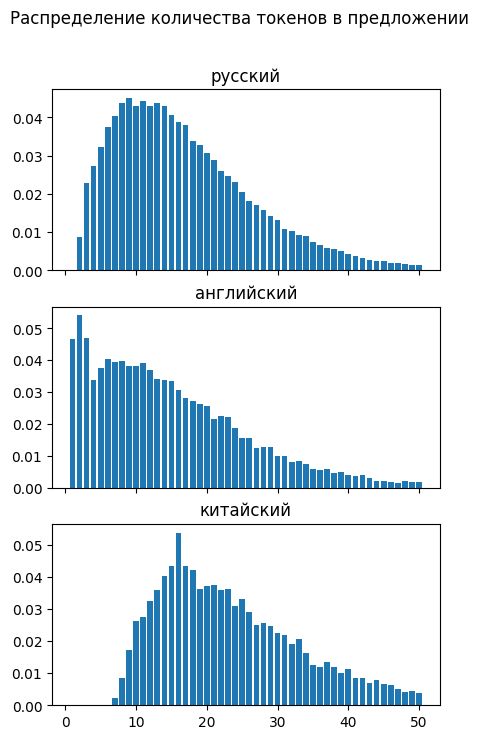

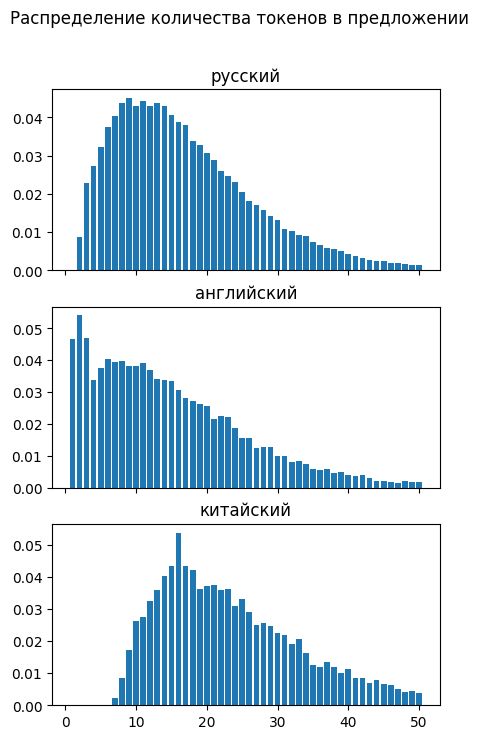

In [ ]:
#define grid of plots
fig, axs = plt.subplots(nrows= 3 , ncols= 1, sharex=True, figsize=(5, 8))

#add title
fig.suptitle('Распределение количества токенов в предложении')

#add data to plots
for bar_i, lang in enumerate(token_counters):
  x, y = zip(*([(i, j / len_lang[lang]) for i, j in token_counters[lang].items() if i <= 50]))
  axs[bar_i].bar(x, height=y)
  axs[bar_i].title.set_text(lang_russian_title[lang])


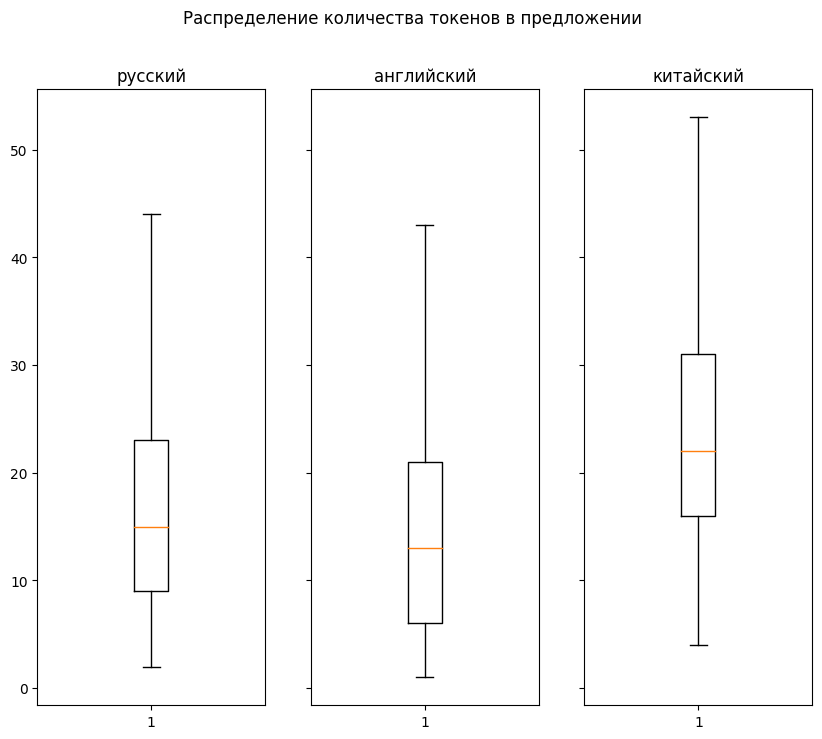

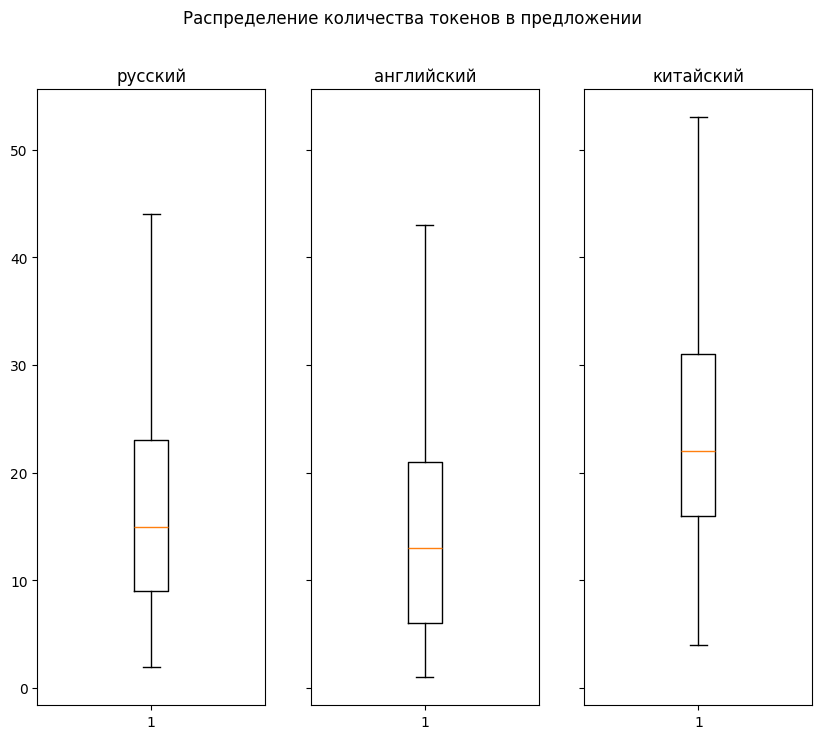

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,8), sharey=True)
fig.suptitle('Распределение количества токенов в предложении')

for col_i, lang in enumerate(token_counters):
    ax[col_i].boxplot(x=list(token_counters[lang].elements()), showfliers=False,showcaps=True)
    ax[col_i].title.set_text(lang_russian_title[lang])

plt.show()

In [ ]:
for lang in languages:
  print(lang)
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 10]) / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 20 and token_amount > 10])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 30 and token_amount > 20])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 40 and token_amount > 30])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount <= 50 and token_amount > 40])  / len_lang[lang], 2), end = " ")
  print(round(sum([rate for token_amount, rate in token_counters[lang].items() if token_amount >= 50]) / len_lang[lang], 2))

rus
0.3 0.39 0.2 0.07 0.02 0.01
eng
0.42 0.32 0.16 0.07 0.02 0.02
chi
0.05 0.39 0.3 0.15 0.06 0.04


rus
0.3 0.39 0.2 0.07 0.02 0.01

eng
0.42 0.32 0.16 0.07 0.02 0.02

chi
0.05 0.39 0.3 0.15 0.06 0.04


## Группировка датасетов по токенам

In [ ]:
import pandas as pd

In [ ]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.words):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, sent_i))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "sent_i"])
    return info_df

In [ ]:
node_df_dict = {}
for lang in sents:
    node_df_dict[lang] = create_node_df(sents[lang])

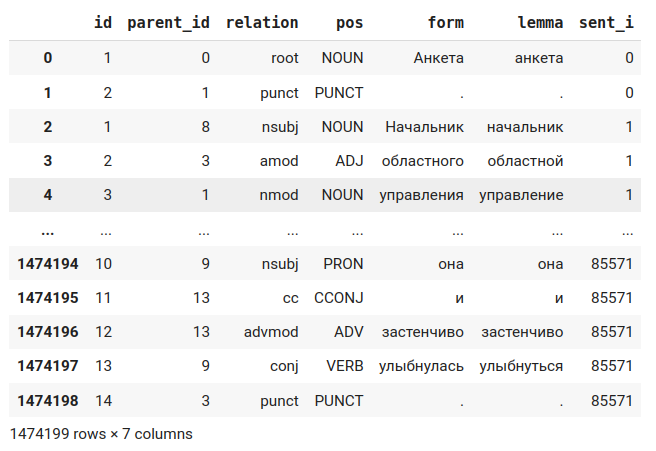

In [ ]:
node_df_dict['rus']

,id,parent_id,relation,pos,form,lemma,sent_i
0,1,0,root,NOUN,Анкета,анкета,0
1,2,1,punct,PUNCT,.,.,0
2,1,8,nsubj,NOUN,Начальник,начальник,1
3,2,3,amod,ADJ,областного,областной,1
4,3,1,nmod,NOUN,управления,управление,1
...,...,...,...,...,...,...,...
1474194,10,9,nsubj,PRON,она,она,85571
1474195,11,13,cc,CCONJ,и,и,85571
1474196,12,13,advmod,ADV,застенчиво,застенчиво,85571
1474197,13,9,conj,VERB,улыбнулась,улыбнуться,85571


# Начальная форма

In [ ]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

rus 0.04
eng 0.07
chi 0.16


rus 0.04

eng 0.07

chi 0.16

# Часть речи

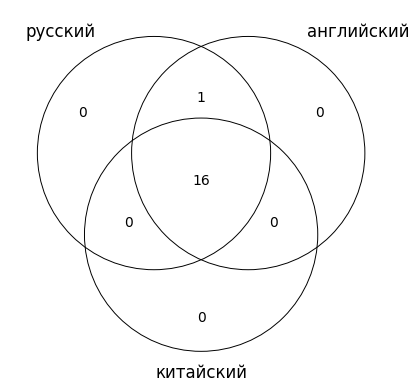

In [ ]:
from matplotlib_venn import venn3_unweighted, venn3_circles

pos_set = [set(node_df_dict[lang]['pos']) for lang in languages]

venn3_unweighted(pos_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [ ]:
(set(node_df_dict['rus']['pos']) & set(node_df_dict['eng']['pos'])) - set(node_df_dict['chi']['pos'])

{'INTJ'}

In [ ]:
relative_pos_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_pos_rate[lang] = {i: j / node_amount for i, j in node_df.groupby('pos').size().items()}

In [ ]:
pos_df_list = []
pos_rows = []
for pos in relative_pos_rate['rus']:
  pos_df_list.append([relative_pos_rate[lang].get(pos, 0) for lang in languages])
  pos_rows.append(pos)
pos_df = pd.DataFrame(pos_df_list, pos_rows, languages)

In [ ]:
pos_df.round(4)

,rus,eng,chi
ADJ,0.0965,0.0660,0.0246
ADP,0.0928,0.0858,0.0457
ADV,0.0504,0.0491,0.0250
AUX,0.0091,0.0625,0.0316
CCONJ,0.0360,0.0321,0.0141
DET,0.0272,0.0789,0.0108
INTJ,0.0002,0.0037,0.0000
NOUN,0.2380,0.1692,0.2761
NUM,0.0125,0.0198,0.0540
PART,0.0328,0.0277,0.0802


In [ ]:
for lang in languages:
    print(lang)
    print(pos_df[lang].sort_values(ascending=False)[:5].round(2))

rus
NOUN     0.24
PUNCT    0.18
VERB     0.11
ADJ      0.10
ADP      0.09
Name: rus, dtype: float64
eng
NOUN     0.17
PUNCT    0.12
VERB     0.11
PRON     0.09
ADP      0.09
Name: eng, dtype: float64
chi
NOUN     0.28
VERB     0.15
PUNCT    0.14
PROPN    0.09
PART     0.08
Name: chi, dtype: float64


# Тип связи

In [ ]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['relation'])))

rus 45
eng 52
chi 43


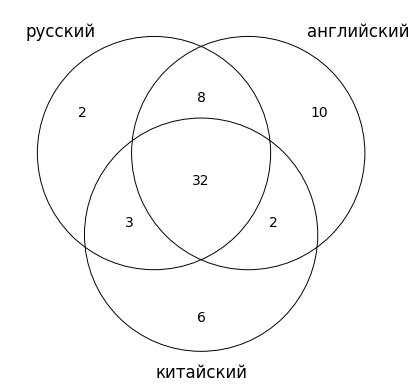

In [ ]:
from matplotlib_venn import venn3_unweighted, venn3_circles

relations_set = [set(node_df_dict[lang]['relation']) for lang in languages]

venn3_unweighted(relations_set,
      set_colors=('#ffffff', '#ffffff', '#ffffff'),
      set_labels = [lang_russian_title[lang] for lang in languages],
      alpha=0.75)
venn3_circles((1,1,1,1,1,1,1), lw=0.7)

plt.show()

In [ ]:
relative_relation_rate = {}
for lang, node_df in node_df_dict.items():
  node_amount = len(node_df)
  relative_relation_rate[lang] = {i: (j / node_amount) for i, j in node_df.groupby('relation').size().items()}

In [ ]:
relation_set = {r for lang in languages for r in relative_relation_rate[lang]}

In [ ]:
relation_df_list = []
relation_rows = list(relation_set)
for relation in relation_rows:
  relation_df_list.append([relative_relation_rate[lang].get(relation) for lang in languages])
relation_df = pd.DataFrame(relation_df_list, relation_rows, languages)

In [ ]:
for lang in languages:
    print(lang)
    print(relation_df[lang].sort_values(ascending=False)[:5].round(2))

rus
punct    0.18
case     0.09
nmod     0.08
obl      0.08
amod     0.08
Name: rus, dtype: float64
eng
punct    0.12
case     0.08
nsubj    0.08
det      0.08
root     0.07
Name: eng, dtype: float64
chi
punct    0.14
nmod     0.13
nsubj    0.08
case     0.07
obj      0.06
Name: chi, dtype: float64


In [ ]:
[relation_df[lang] > 0.001 for lang in languages][0]

cc               True
det:predet      False
obl:patient     False
root             True
compound:ext    False
                ...  
mark             True
mark:adv        False
acl              True
discourse       False
cc:preconj      False
Name: rus, Length: 63, dtype: bool

In [ ]:
relation_df[((relation_df['rus'] > 0.05) | (relation_df['eng'] > 0.05) | (relation_df['chi'] > 0.05))].round(3)

,rus,eng,chi
root,0.058,0.065,0.041
advmod,0.064,0.055,0.026
nummod,0.006,0.012,0.051
obl,0.081,0.042,0.027
punct,0.184,0.116,0.138
amod,0.080,0.048,0.017
nmod,0.082,0.033,0.132
obj,0.033,0.048,0.063
nsubj,0.068,0.078,0.076
det,0.025,0.076,0.012


In [ ]:
pd.set_option('display.max_rows', None)
relation_df.round(6)

,rus,eng,chi
cc,0.036829,0.032488,0.014162
det:predet,NaN,0.000875,NaN
obl:patient,NaN,NaN,0.001590
root,0.058046,0.065378,0.040530
compound:ext,NaN,NaN,0.000203
obl:npmod,NaN,0.002188,NaN
appos,0.007995,0.007479,0.011006
compound:prt,NaN,0.003572,NaN
advmod,0.064109,0.054646,0.025833
list,0.000008,0.003020,NaN
